# Forcasting Model

In this notebook, I will show you how to build a program that can predict the price of a specific stock.

1. Python
2. Stock Data ( vnindex)
3. Prediction Pipeline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

### Pipeline

```
[Stock Data] -> [Step 1. Data Processing] -> [Step 2 Feature Selection] ->[Step 3. Data Visualization] -> [Step 4. Build Model] -> [Step 5 Make A Prediction]

```

In [4]:
df = pd.read_csv('/shared_storage/bi_mlearn_training/courses/vn_index.csv')
df.head()

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>
0,^VNINDEX,20201231,1098.25,1105.33,1096.5100,1103.87,527818627,1098.25,1105.33,1096.5100,1103.87,0,0,0
1,^VNINDEX,20201230,1099.78,1108.83,1094.9100,1097.54,676978950,1099.78,1108.83,1094.9100,1097.54,0,19024340,27051460
2,^VNINDEX,20201229,1090.49,1102.79,1087.9301,1099.49,678818432,1090.49,1102.79,1087.9301,1099.49,0,22988220,28797880
3,^VNINDEX,20201228,1094.37,1096.11,1083.9000,1091.33,723882551,1094.37,1096.11,1083.9000,1091.33,0,19878890,33900150
4,^VNINDEX,20201225,1068.83,1084.42,1061.8300,1084.42,652808639,1068.83,1084.42,1061.8300,1084.42,0,13924720,17427310


In [13]:
print(len(df))

4931


### Step 1.  Data Processing
We can use raplace or apply() function to process or clean the data.
```
df['new_column'] = df['old_column'].apply(lamda_function)
df = df.replace({'\$':''}, regex = True)
```
In this example, I rename and format again the column and fields.

In [5]:
df = df.rename(columns={"<DTYYYYMMDD>": "Date", "<Close>": "Close"})
df = df.astype({"Close": float})
df = df.astype({"Date": str})
df["Date"] = pd.to_datetime(df.Date, format="%Y%m%d")

In [20]:
print(df.head())

   <Ticker>       Date  <OpenFixed>  <HighFixed>  <LowFixed>  <CloseFixed>  \
0  ^VNINDEX 2020-12-31      1098.25      1105.33   1096.5100       1103.87   
1  ^VNINDEX 2020-12-30      1099.78      1108.83   1094.9100       1097.54   
2  ^VNINDEX 2020-12-29      1090.49      1102.79   1087.9301       1099.49   
3  ^VNINDEX 2020-12-28      1094.37      1096.11   1083.9000       1091.33   
4  ^VNINDEX 2020-12-25      1068.83      1084.42   1061.8300       1084.42   

    <Volume>   <Open>   <High>      <Low>    Close  <VolumeDeal>  <VolumeFB>  \
0  527818627  1098.25  1105.33  1096.5100  1103.87             0           0   
1  676978950  1099.78  1108.83  1094.9100  1097.54             0    19024340   
2  678818432  1090.49  1102.79  1087.9301  1099.49             0    22988220   
3  723882551  1094.37  1096.11  1083.9000  1091.33             0    19878890   
4  652808639  1068.83  1084.42  1061.8300  1084.42             0    13924720   

   <VolumeFS>  
0           0  
1    27051460  
2 

### Step 2. Feature Selection.

In [6]:
# For our prediction project, we will just need “Date” and “Open” columns. Let’s get rid of the other columns then.
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2020-12-31,1103.87
1,2020-12-30,1097.54
2,2020-12-29,1099.49
3,2020-12-28,1091.33
4,2020-12-25,1084.42


### Step 3 Data Visualization


/home/phuongdv/anaconda3/envs/data-sci-env/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


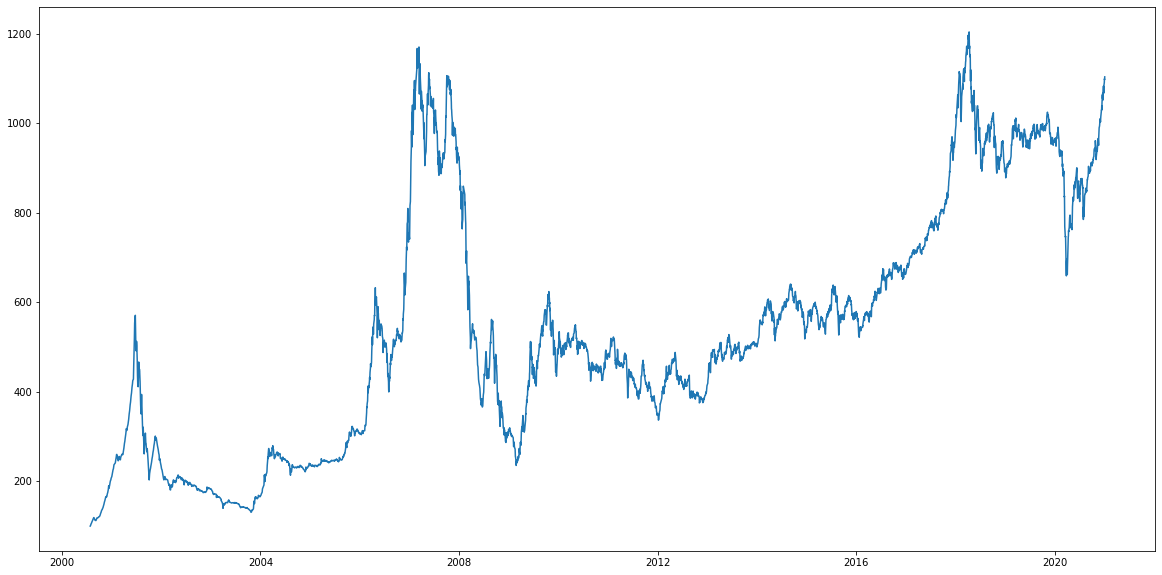

In [7]:
# We will just define the dataframe’s index value as the date column. This will be helpful in the data visualization step.
df.index = df['Date']
plt.plot(df["Close"],label='Close Price history')

### Step 4 Build Prediction Model
LSTM (Long Short-Term Memory)models work great when making predictions based on time-series datasets.( You can build your own accually:) )

In [8]:
# df = pd.read_csv('HistoricalData_AAPL.csv')

# F(x)  = x+x1+x4/3
df = df.sort_index(ascending=True,axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Close
0,2000-07-28,100.00
1,2000-07-31,101.55
2,2000-08-02,103.38
3,2000-08-04,105.20
4,2000-08-07,106.92


In [12]:
data['Close'].mean()

543.529415879132

In [10]:
## copy for the Demo :)
data = df.copy()

In [13]:
## norm(x) = (x-Min(x)/Max(x)

# RAW data -> Norn(X) => New_data -> BUILD(MODEL)
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop('Date',axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:2000,:]
valid_data=final_data[2000:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)

# Build training dataset. Ideally, we will use the historical price of the last 60 days to predict today.

x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [15]:
# LSTM Model
# In this step, we are defining the Long Short-Term Memory model.
# model = keras.Sequential(
#     [
#         layers.Dense(2, activation="relu"),
#         layers.Dense(3, activation="relu"),
#         layers.Dense(4),
#     ]
# )

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(np.shape(x_train_data)[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
print(lstm_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Train and Test Data
# This step covers the preparation of the train data and the test data.
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x=np.array(x_train_data), y=np.array(y_train_data), epochs=3, batch_size=1, verbose=2)
# history = model.fit(x=np.array(tr_X), y=np.array(tr_Y), epochs=3, validation_data=(np.array(va_X), np.array(va_Y)), batch_size=batch_size, steps_per_epoch=spe, validation_freq=5)

Epoch 1/3
1940/1940 - 44s - loss: 0.0016 - 44s/epoch - 23ms/step
Epoch 2/3
1940/1940 - 41s - loss: 6.4243e-04 - 41s/epoch - 21ms/step
Epoch 3/3
1940/1940 - 42s - loss: 3.8828e-04 - 42s/epoch - 22ms/step


### Step 5 Make a prediction.
In this step, we are running the model using the test data we defined in the previous step.


In [21]:
# F(X) = x*2+ a*x^2 + b
# a= 3
# b = 5
# F(X)_the optimal_model = x*2+ 3*x^2 + 5


model_data = data[len(data) - len(valid_data) - 60:].values
# model_data = model_data.reshape(-1, 1)
model_data = scaler.transform(model_data)
X_test = []
for i in range(60, model_data.shape[0]):
    X_test.append(model_data[i - 60:i, 0])
X_test = np.array(X_test)
print(">>before transformation")
print(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(">>after transformation")
print(X_test)
# print(np.shape(x_train_data)[1])


>>before transformation
[[0.19391848 0.19323934 0.1921346  ... 0.20135286 0.19356533 0.19171806]
 [0.19323934 0.1921346  0.18756169 ... 0.19356533 0.19171806 0.20378872]
 [0.1921346  0.18756169 0.18833139 ... 0.19171806 0.20378872 0.2173354 ]
 ...
 [0.73861074 0.74227812 0.74148126 ... 0.87611493 0.89141833 0.89767551]
 [0.74227812 0.74148126 0.74615378 ... 0.89141833 0.89767551 0.90506461]
 [0.74148126 0.74615378 0.74781089 ... 0.89767551 0.90506461 0.90329883]]
>>after transformation
[[[0.19391848]
  [0.19323934]
  [0.1921346 ]
  ...
  [0.20135286]
  [0.19356533]
  [0.19171806]]

 [[0.19323934]
  [0.1921346 ]
  [0.18756169]
  ...
  [0.19356533]
  [0.19171806]
  [0.20378872]]

 [[0.1921346 ]
  [0.18756169]
  [0.18833139]
  ...
  [0.19171806]
  [0.20378872]
  [0.2173354 ]]

 ...

 [[0.73861074]
  [0.74227812]
  [0.74148126]
  ...
  [0.87611493]
  [0.89141833]
  [0.89767551]]

 [[0.74227812]
  [0.74148126]
  [0.74615378]
  ...
  [0.89141833]
  [0.89767551]
  [0.90506461]]

 [[0.74148126

In [22]:
print(X_test[0])

[[0.19391848]
 [0.19323934]
 [0.1921346 ]
 [0.18756169]
 [0.18833139]
 [0.18473645]
 [0.18664711]
 [0.18561481]
 [0.18369509]
 [0.18114151]
 [0.18211948]
 [0.18401203]
 [0.17885958]
 [0.17086378]
 [0.16852752]
 [0.16101165]
 [0.16447077]
 [0.16984959]
 [0.16482392]
 [0.15957187]
 [0.15945415]
 [0.15802342]
 [0.15603126]
 [0.14766419]
 [0.14043809]
 [0.14022077]
 [0.13815617]
 [0.13041392]
 [0.12269883]
 [0.13069463]
 [0.12906468]
 [0.13197142]
 [0.13371003]
 [0.12809577]
 [0.1307218 ]
 [0.13282262]
 [0.1319352 ]
 [0.13388208]
 [0.13753135]
 [0.14112629]
 [0.13674355]
 [0.13713292]
 [0.13995816]
 [0.14778191]
 [0.15700923]
 [0.15125913]
 [0.15087881]
 [0.14502911]
 [0.15450092]
 [0.16084866]
 [0.1686543 ]
 [0.16970471]
 [0.16514991]
 [0.16360146]
 [0.17161537]
 [0.17866036]
 [0.1904141 ]
 [0.20135286]
 [0.19356533]
 [0.19171806]]


In [23]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

/home/phuongdv/anaconda3/envs/data-sci-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


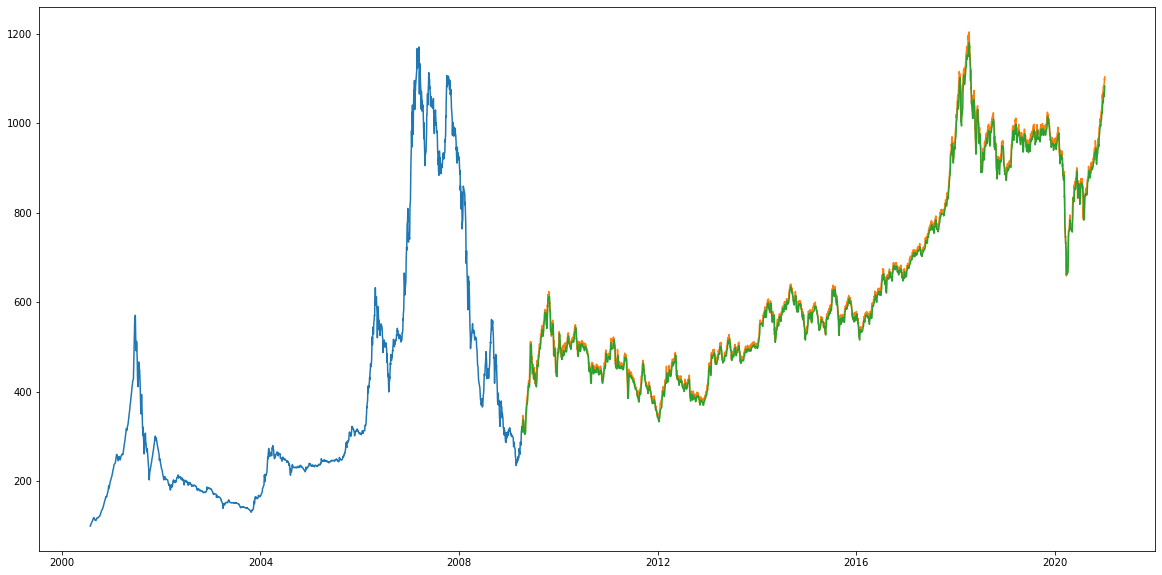

In [24]:
### Prediction Result
train_data=data[:2000]
valid_data=data[2000:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [28]:
predicted_stock_price[-1:]

array([[1083.4657]], dtype=float32)

In [30]:
valid_data[-2:]

,Close,Predictions
Date,,
2020-12-30,1097.54,1079.495850
2020-12-31,1103.87,1083.465698
